In [35]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [36]:
# Question 1.1
import yfinance as yf

# Ticker symbol for HP Inc.
ticker_symbol = "HPQ"

# Define the date range
start_date = "2015-01-01"
end_date = "2019-12-31"

# Downloading the monthly stock price data for HP Inc.
hpq_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval="1mo")
print(hpq_data)

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2015-01-01  18.192553  18.664850  16.376022  16.407810  12.503572  494443687
2015-02-01  16.466848  17.647593  15.299728  15.821980  12.057141  605870609
2015-03-01  15.821980  15.953678  14.091735  14.150772  10.783596  734120816
2015-04-01  14.464124  15.326975  14.078111  14.972752  11.465274  481770518
2015-05-01  15.077203  16.167122  14.645777  15.168029  11.614805  464403121
2015-06-01  15.172570  15.567666  13.405995  13.628520  10.435938  570074677
2015-07-01  13.773842  14.287012  13.496821  13.860127  10.670333  610446366
2015-08-01  13.891916  13.978202  11.285195  12.742961   9.810279  709819326
2015-09-01  12.438692  13.033606  11.035422  11.630336   8.953713  756659829
2015-10-01  11.589464  13.519528  11.353315  12.243415   9.485044  640833967
2015-11

In [3]:
# Question 1.2
import yfinance as yf
import numpy as np

# Download the data
ticker_symbol = "HPQ"
start_date = "2015-01-01"
end_date = "2019-12-31"
hpq_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval="1mo")

# Calculate the logarithmic returns
hpq_data['Log_Returns'] = np.log(hpq_data['Adj Close'] / hpq_data['Adj Close'].shift(1))

# Drop NaN values that result from the shift operation
hpq_data.dropna(inplace=True)

# Compute the average monthly return
average_monthly_return = hpq_data['Log_Returns'].mean()

# Annualize the return
annualized_return = average_monthly_return * 12

# Output the annualized return
print("Annualized Return:", annualized_return)

[*********************100%%**********************]  1 of 1 completed
Annualized Return: 0.0747338561304559


In [4]:
# Question 1.3
import yfinance as yf
import numpy as np

# Download the data
ticker_symbol = "HPQ"
start_date = "2015-01-01"
end_date = "2019-12-31"
hpq_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval="1mo")

# Calculate the logarithmic returns
hpq_data['Log_Returns'] = np.log(hpq_data['Adj Close'] / hpq_data['Adj Close'].shift(1))

# Drop NaN values that result from the shift operation
hpq_data.dropna(inplace=True)

# Compute the average monthly return
average_monthly_return = hpq_data['Log_Returns'].mean()

# Annualize the return
annualized_return = average_monthly_return * 12

# Compute the monthly volatility (standard deviation)
monthly_volatility = hpq_data['Log_Returns'].std()

# Annualize the volatility
annualized_volatility = monthly_volatility * np.sqrt(12)

# Output the annualized return and volatility
print("Annualized Return:", annualized_return)
print("Annualized Volatility:", annualized_volatility)

[*********************100%%**********************]  1 of 1 completed
Annualized Return: 0.07473378810591172
Annualized Volatility: 0.26302568517242464


In [27]:
# Question 1.4
pip install yesg

SyntaxError: invalid syntax (3636875541.py, line 2)

/var/folders/z6/8ggxdng53zdfrl26ccy3r95w0000gn/T/ipykernel_47519/2910931251.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  ESG.new = pd.DataFrame.dropna(ESG)


Text(0.5, 1.0, 'ESG for Hewlett-Packard Co.')

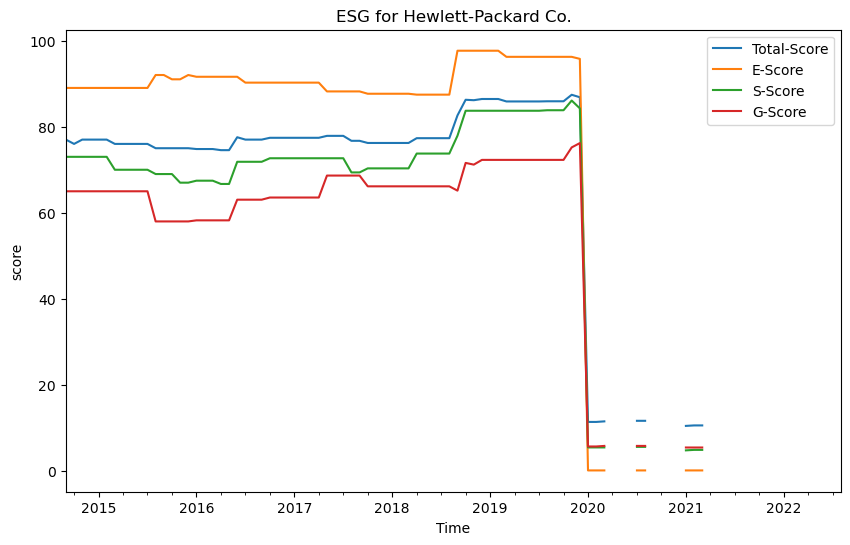

In [7]:
import yesg
ESG = yesg.get_historic_esg('HPQ')
ESG
ESG.new = pd.DataFrame.dropna(ESG)
ESG.new
ESG.plot(figsize=(10, 6))
plt.xlabel('Time')
plt.ylabel('score')
plt.title('ESG for Hewlett-Packard Co.')

In [28]:
# Question 1.5
import numpy as np

stock_data['Log_Returns'] = np.log(stock_data['Adj Close'] / stock_data['Adj Close'].shift(1))

In [29]:
# Replace 'Total_Score' with the actual column name for ESG scores in your DataFrame

combined_data = pd.merge(stock_data[['Log_Returns']], esg_data[['Total-Score']], left_index=True, right_index=True)

# Calculating the correlation coefficient
correlation = combined_data['Log_Returns'].corr(combined_data['Total-Score'])

print("Correlation coefficient:", correlation)

Correlation coefficient: -0.1001771768389183


In [34]:
# Question 2

In [33]:
pip install meteostat

  Obtaining dependency information for meteostat from https://files.pythonhosted.org/packages/23/93/0d277de2b38238072b850e33fbd94e230951f2e5d7ac140ae221a05215b0/meteostat-1.6.7-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [37]:
import numpy as np
from datetime import datetime
from meteostat import Point, Daily
import matplotlib.pyplot as plt

# Shenzhen's geographical coordinates
latitude = 22.5429
longitude = 114.0596
altitude = 4  # Altitude in meters

# Define the location
location = Point(latitude, longitude, altitude)

# Define the time period
start = datetime(2022, 1, 1)
end = datetime(2022, 1, 31)

# Fetch daily data for the location and time period
data = Daily(location, start, end)
data = data.fetch()

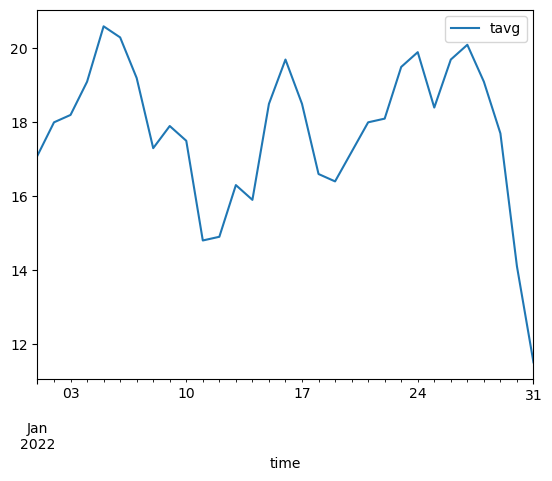

Total HDD for Shenzhen in January 2022: 26.799999999999997


In [38]:
# Plot the average temperature
data.plot(y=['tavg'])
plt.show()

# Set the base temperature for HDD (commonly 18 degrees Celsius)
T_base = 18

# Calculate HDD
hdds = [max(T_base - temp, 0) for temp in data['tavg']]
total_hdd = sum(hdds)

# Print the total HDD for Shenzhen in January 2022
print("Total HDD for Shenzhen in January 2022:", total_hdd)